#### Task #7 GRIP @ The Sparks Foundation
#### Submitted by - Parul Purwar

## Stock Price Prediction of S&P BSE SENSEX using historical and news data

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata



In [2]:
# warnings

import warnings
warnings.filterwarnings('ignore')

#### Loading Textual (news) data

In [3]:
# loading news dataset
data_news = pd.read_csv(r'india-news-headlines.csv')

In [4]:
# looking at the dataset
data_news.head()

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


In [5]:
# dropping the headline_category as it contains almost unknown values 
data_news = data_news.drop(['headline_category'], axis = 1)

In [6]:
# looking at the dataset after dropping the headline_category column 
data_news.head()

,publish_date,headline_text
0,20010102,Status quo will not be disturbed at Ayodhya; s...
1,20010102,Fissures in Hurriyat over Pak visit
2,20010102,America's unwanted heading for India?
3,20010102,For bigwigs; it is destination Goa
4,20010102,Extra buses to clear tourist traffic


#### Loading stock price dataset for S&P BSE SENSEX

In [7]:
# loading stock price data
data_price = pd.read_csv(r'HistoricalPrices.csv')

In [8]:
# looking at the info of price dataset
data_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 833 entries, 0 to 832
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    833 non-null    object 
 1    Open   833 non-null    float64
 2    High   833 non-null    float64
 3    Low    833 non-null    float64
 4    Close  833 non-null    float64
dtypes: float64(4), object(1)
memory usage: 32.7+ KB


In [9]:
# looking at the dataset
data_price.tail()

,Date,Open,High,Low,Close
828,02/06/20,41209.13,41405.43,41113.11,41306.03
829,02/05/20,40921.71,41177.00,40703.32,41142.66
830,02/04/20,40178.74,40818.94,40117.46,40789.38
831,02/03/20,39701.02,40014.90,39563.07,39872.31
832,02/01/20,40753.18,40905.78,39631.24,39735.53


In [10]:
# Checking for null values
print(data_news.isna().sum())
print('\n')
data_price.isna().sum()


publish_date     0
headline_text    0
dtype: int64




Date      0
 Open     0
 High     0
 Low      0
 Close    0
dtype: int64

In [11]:
# Checking the number of entries in both the datasets
print('Number of rows in news dataset', data_news.shape[0])
print('Number of rows in price dataset', data_price.shape[0])

Number of rows in news dataset 3650970
Number of rows in price dataset 833


#### Feature Engineering: News Data

In [12]:
# Removing duplicates if any
data_news = data_news.drop_duplicates()

In [13]:
# Changing the format of publish_date and adding it to the new column
data_news['Date'] = pd.to_datetime(data_news['publish_date'], format='%Y%m%d')
data_news['Date'] = data_news['Date'].dt.strftime('%Y/%m/%d')

In [14]:
# dropping the publish_date column
#data_news = data_news.drop(['publish_date'], axis = 1)

# looking at the dataset after changing the format of date
data_news

,publish_date,headline_text,Date
0,20010102,Status quo will not be disturbed at Ayodhya; s...,2001/01/02
1,20010102,Fissures in Hurriyat over Pak visit,2001/01/02
2,20010102,America's unwanted heading for India?,2001/01/02
3,20010102,For bigwigs; it is destination Goa,2001/01/02
4,20010102,Extra buses to clear tourist traffic,2001/01/02
...,...,...,...
3650960,20220331,Garment industry jittery over'GST hike',2022/03/31
3650961,20220331,AAP MLAs interfering in work: Councillors,2022/03/31
3650962,20220331,Schools organise vax camps for kids,2022/03/31
3650965,20220331,J&K sacks 2 cops; 3 other employees over terro...,2022/03/31


In [15]:
data_news.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3488872 entries, 0 to 3650966
Data columns (total 3 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   publish_date   int64 
 1   headline_text  object
 2   Date           object
dtypes: int64(1), object(2)
memory usage: 106.5+ MB


In [16]:
data_news = data_news[data_news['Date'] >= '2020/02/01']
data_news

,publish_date,headline_text,Date
3256931,20200201,Give states power to decide on CAA; TRS MPs te...,2020/02/01
3256932,20200201,Warangal: Three students drown,2020/02/01
3256933,20200201,Will be in power for next 40 yrs: TRS min,2020/02/01
3256934,20200201,BJP to meet Prez on Tukkuguda election,2020/02/01
3256935,20200201,Special inspector; 15 policemen will man busy ...,2020/02/01
...,...,...,...
3650960,20220331,Garment industry jittery over'GST hike',2022/03/31
3650961,20220331,AAP MLAs interfering in work: Councillors,2022/03/31
3650962,20220331,Schools organise vax camps for kids,2022/03/31
3650965,20220331,J&K sacks 2 cops; 3 other employees over terro...,2022/03/31


In [17]:
# grouping the news headlines according to 'Date'
data_news = data_news.groupby(['Date'])['headline_text'].apply(lambda x: ','.join(x)).reset_index()

#### Feature Engineering: Stock Price Data

In [18]:
# Changing the format of publish_date and adding it to the new column
data_price['Date'] = pd.to_datetime(data_price['Date'], format='%m/%d/%y')
data_price['Date'] = data_price['Date'].dt.strftime('%Y/%m/%d')

In [19]:
# looking at the dataset after changing the format of date
data_price.head()

,Date,Open,High,Low,Close
0,2023/06/09,62810.68,62992.16,62594.74,62625.63
1,2023/06/08,63140.17,63321.40,62789.73,62848.64
2,2023/06/07,62917.39,63196.43,62841.95,63142.96
3,2023/06/06,62738.35,62867.95,62554.21,62792.88
4,2023/06/05,62759.19,62943.20,62751.72,62787.47


In [20]:
# looking at the statistics of the numerical data
data_price.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,833.0,51453.391140,9544.403100,26499.81,44729.52,54459.95,59315.98,63357.99
High,833.0,51736.867347,9524.402426,27462.87,44825.37,54758.74,59557.87,63583.07
Low,833.0,51075.663709,9587.745456,25638.90,44247.12,54130.89,58937.64,63183.77
Close,833.0,51415.272761,9563.474954,25981.24,44632.65,54395.23,59276.69,63284.19


In [21]:
# looking at the dataset after scaling
data_price = data_price.sort_values('Date', ascending = True)
data_price

,Date,Open,High,Low,Close
832,2020/02/01,40753.18,40905.78,39631.24,39735.53
831,2020/02/03,39701.02,40014.90,39563.07,39872.31
830,2020/02/04,40178.74,40818.94,40117.46,40789.38
829,2020/02/05,40921.71,41177.00,40703.32,41142.66
828,2020/02/06,41209.13,41405.43,41113.11,41306.03
...,...,...,...,...,...
4,2023/06/05,62759.19,62943.20,62751.72,62787.47
3,2023/06/06,62738.35,62867.95,62554.21,62792.88
2,2023/06/07,62917.39,63196.43,62841.95,63142.96
1,2023/06/08,63140.17,63321.40,62789.73,62848.64


#### Combined dataset

In [22]:
# concatenating the datasets stock_price and stock_headlines
data = pd.merge(data_news, data_price)

# dropping the null values if any
data.dropna(axis=0, inplace=True)

# displaying the combined stock_data
data

,Date,headline_text,Open,High,Low,Close
0,2020/02/01,Give states power to decide on CAA; TRS MPs te...,40753.18,40905.78,39631.24,39735.53
1,2020/02/03,Fan holds up banner asking if season 13 of the...,39701.02,40014.90,39563.07,39872.31
2,2020/02/04,Students explored their fashion fundas at this...,40178.74,40818.94,40117.46,40789.38
3,2020/02/05,Heritage preservation club at Tennur school fo...,40921.71,41177.00,40703.32,41142.66
4,2020/02/06,Nashik traders seek rollback of onion export b...,41209.13,41405.43,41113.11,41306.03
...,...,...,...,...,...,...
533,2022/03/25,Speeding up; shortcuts and tackling unruly cus...,57801.72,57845.37,57100.24,57362.20
534,2022/03/28,As fashion becomes democratic; demand for styl...,57472.72,57638.34,56825.09,57593.49
535,2022/03/29,Bobby Deol: Like my dad; I hope to be working ...,57814.76,58001.53,57639.35,57943.65
536,2022/03/30,"I will not give in to trends: Dossmode,The tim...",58362.85,58727.78,58176.00,58683.99


In [23]:
# looking at the combined data
data.tail()

,Date,headline_text,Open,High,Low,Close
533,2022/03/25,Speeding up; shortcuts and tackling unruly cus...,57801.72,57845.37,57100.24,57362.20
534,2022/03/28,As fashion becomes democratic; demand for styl...,57472.72,57638.34,56825.09,57593.49
535,2022/03/29,Bobby Deol: Like my dad; I hope to be working ...,57814.76,58001.53,57639.35,57943.65
536,2022/03/30,"I will not give in to trends: Dossmode,The tim...",58362.85,58727.78,58176.00,58683.99
537,2022/03/31,Shashank goes back to coastal Karnataka and Mo...,58779.71,58890.92,58485.79,58568.51


### Calculating Sentiment Scores

In [24]:
# creating sentimentIntensityAnalyzer object
sid = SentimentIntensityAnalyzer()

In [25]:
# calculating sentiment scores
data['compound'] = data['headline_text'].apply(lambda x: sid.polarity_scores(x)['compound'])
data['negative'] = data['headline_text'].apply(lambda x: sid.polarity_scores(x)['neg'])
data['neutral'] = data['headline_text'].apply(lambda x: sid.polarity_scores(x)['neu'])
data['positive'] = data['headline_text'].apply(lambda x: sid.polarity_scores(x)['pos'])

In [26]:
# looking at the scores obtained
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 538 entries, 0 to 537
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           538 non-null    object 
 1   headline_text  538 non-null    object 
 2    Open          538 non-null    float64
 3    High          538 non-null    float64
 4    Low           538 non-null    float64
 5    Close         538 non-null    float64
 6   compound       538 non-null    float64
 7   negative       538 non-null    float64
 8   neutral        538 non-null    float64
 9   positive       538 non-null    float64
dtypes: float64(8), object(2)
memory usage: 42.2+ KB


### Saving the stock data to a .csv file

In [27]:
data = data.drop(['headline_text'], axis = 1)

In [28]:
data.to_csv('stockdata.csv')

In [29]:
stockdata = pd.read_csv('stockdata.csv')
stockdata = stockdata.set_index('Date')
stockdata.tail()

,Unnamed: 0,Open,High,Low,Close,compound,negative,neutral,positive
Date,,,,,,,,,
2022/03/25,533,57801.72,57845.37,57100.24,57362.20,-0.9999,0.161,0.773,0.066
2022/03/28,534,57472.72,57638.34,56825.09,57593.49,-0.9999,0.152,0.760,0.088
2022/03/29,535,57814.76,58001.53,57639.35,57943.65,-0.9998,0.134,0.785,0.080
2022/03/30,536,58362.85,58727.78,58176.00,58683.99,-0.9999,0.136,0.801,0.063
2022/03/31,537,58779.71,58890.92,58485.79,58568.51,-0.9999,0.144,0.790,0.066


### Data Exploration: Final Stock Data

In [30]:
stockdata.shape

(538, 9)

In [31]:
stockdata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 538 entries, 2020/02/01 to 2022/03/31
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  538 non-null    int64  
 1    Open       538 non-null    float64
 2    High       538 non-null    float64
 3    Low        538 non-null    float64
 4    Close      538 non-null    float64
 5   compound    538 non-null    float64
 6   negative    538 non-null    float64
 7   neutral     538 non-null    float64
 8   positive    538 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 42.0+ KB


In [32]:
stockdata.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,538.0,268.500000,155.451493,0.000,134.2500,268.5000,402.7500,537.0000
Open,538.0,47433.291859,9532.126981,26499.810,38895.6475,49265.3850,56300.6325,62156.4800
High,538.0,47709.797305,9499.323975,27462.870,39084.2450,49660.1450,56543.9100,62245.4300
Low,538.0,47022.701171,9553.871378,25638.900,38546.9825,48959.3700,55809.5200,61624.6500
Close,538.0,47376.757974,9538.077995,25981.240,38809.3900,49242.9200,56216.6400,61765.5900
compound,538.0,-0.984777,0.170890,-1.000,-0.9999,-0.9998,-0.9996,0.9997
negative,538.0,0.129344,0.018527,0.077,0.1170,0.1310,0.1420,0.1990
neutral,538.0,0.794394,0.023362,0.729,0.7780,0.7920,0.8090,0.8740
positive,538.0,0.076230,0.011428,0.045,0.0690,0.0760,0.0830,0.1240


In [33]:
stockdata.isnull().sum()

Unnamed: 0    0
 Open         0
 High         0
 Low          0
 Close        0
compound      0
negative      0
neutral       0
positive      0
dtype: int64

### Exploratory Data Analysis: Final stock data

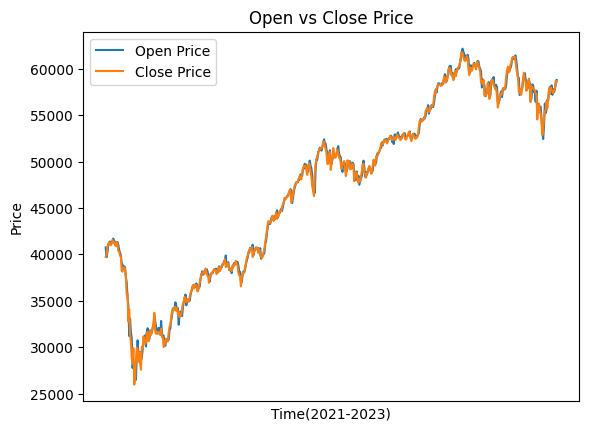

In [34]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called 'stock_data' with 'open' and 'close' columns

# Plotting the data
plt.plot(stockdata[' Open'], label='Open Price')
plt.plot(stockdata[' Close'], label='Close Price')

plt.xticks([])

# Adding labels and title
plt.xlabel('Time(2021-2023)')
plt.ylabel('Price')
plt.title('Open vs Close Price')

# Adding legend
plt.legend()

# Displaying the plot
plt.show()
     

## Modelling

### Data prepration for modelling

#### Adding a new column to consider as label (closed price of next day)

In [82]:
stockdata[' Close'][:]

Date
2020/02/01    39735.53
2020/02/03    39872.31
2020/02/04    40789.38
2020/02/05    41142.66
2020/02/06    41306.03
                ...   
2022/03/25    57362.20
2022/03/28    57593.49
2022/03/29    57943.65
2022/03/30    58683.99
2022/03/31    58568.51
Name:  Close, Length: 538, dtype: float64

In [35]:
# Creating a data frame for the label
closedprice = stockdata[' Close'][1:]
closedprice

Date
2020/02/03    39872.31
2020/02/04    40789.38
2020/02/05    41142.66
2020/02/06    41306.03
2020/02/07    41141.85
                ...   
2022/03/25    57362.20
2022/03/28    57593.49
2022/03/29    57943.65
2022/03/30    58683.99
2022/03/31    58568.51
Name:  Close, Length: 537, dtype: float64

In [94]:
# Adding new column
stockdatanew = pd.concat([stockdata, closedprice], axis = 1)
stockdatanew

,Unnamed: 0,Open,High,Low,Close,compound,negative,neutral,positive,Close
Date,,,,,,,,,,
2020/02/01,0,40753.18,40905.78,39631.24,39735.53,-0.9999,0.152,0.767,0.081,NaN
2020/02/03,1,39701.02,40014.90,39563.07,39872.31,-0.9969,0.118,0.772,0.109,39872.31
2020/02/04,2,40178.74,40818.94,40117.46,40789.38,-0.9999,0.174,0.745,0.081,40789.38
2020/02/05,3,40921.71,41177.00,40703.32,41142.66,-0.9999,0.151,0.772,0.077,41142.66
2020/02/06,4,41209.13,41405.43,41113.11,41306.03,-0.9999,0.158,0.759,0.082,41306.03
...,...,...,...,...,...,...,...,...,...,...
2022/03/25,533,57801.72,57845.37,57100.24,57362.20,-0.9999,0.161,0.773,0.066,57362.20
2022/03/28,534,57472.72,57638.34,56825.09,57593.49,-0.9999,0.152,0.760,0.088,57593.49
2022/03/29,535,57814.76,58001.53,57639.35,57943.65,-0.9998,0.134,0.785,0.080,57943.65


In [95]:
stockdatanew = stockdatanew.drop(['Unnamed: 0'], axis = 1)

In [97]:
# Get the list of column names
column_names = list(stockdatanew.columns)

# Find the index of the column with the duplicate name
duplicate_column_index = column_names.index(" Close")

# Change the name of the column at the specified index
new_column_name = "Close price shifted"
column_names[-1] = new_column_name

# Update the DataFrame with the new column name
stockdatanew.columns = column_names

# Print the DataFrame
stockdatanew

,Open,High,Low,Close,compound,negative,neutral,positive,Close price shifted
Date,,,,,,,,,
2020/02/01,40753.18,40905.78,39631.24,39735.53,-0.9999,0.152,0.767,0.081,NaN
2020/02/03,39701.02,40014.90,39563.07,39872.31,-0.9969,0.118,0.772,0.109,39872.31
2020/02/04,40178.74,40818.94,40117.46,40789.38,-0.9999,0.174,0.745,0.081,40789.38
2020/02/05,40921.71,41177.00,40703.32,41142.66,-0.9999,0.151,0.772,0.077,41142.66
2020/02/06,41209.13,41405.43,41113.11,41306.03,-0.9999,0.158,0.759,0.082,41306.03
...,...,...,...,...,...,...,...,...,...
2022/03/25,57801.72,57845.37,57100.24,57362.20,-0.9999,0.161,0.773,0.066,57362.20
2022/03/28,57472.72,57638.34,56825.09,57593.49,-0.9999,0.152,0.760,0.088,57593.49
2022/03/29,57814.76,58001.53,57639.35,57943.65,-0.9998,0.134,0.785,0.080,57943.65


In [99]:
stockdatanew['Close price shifted'] = stockdatanew['Close price shifted'].shift(-1)

In [103]:
stockdataupdated = stockdatanew.dropna()

#### Scaling and splitting the dataset

In [144]:
# Scaling the dataset
ss_feature = StandardScaler()
ss_label = StandardScaler()

In [145]:
features = stockdataupdated.iloc[:, 0:-1]
features = pd.DataFrame(ss_feature.fit_transform(features), columns = features.columns)
label = stockdataupdated.iloc[:, -1]
label = ss_label.fit_transform(label.values.reshape(-1,1))


In [146]:
n = int(0.8*stockdataupdated.shape[0])

train_set = features.iloc[:n, :]
train_label = label[:n]

test_set = features.iloc[n:, :]
test_label = label[n:]

print('Shape of training set',train_set.shape)
print('Shape of training label',train_label.shape)
print('Shape of test set',test_set.shape)
print('Shape of test label',test_label.shape)


Shape of training set (429, 8)
Shape of training label (429, 1)
Shape of test set (108, 8)
Shape of test label (108, 1)


In [147]:
# Converting into numpy array
train_set_numpy = train_set.to_numpy()
test_set_numpy = test_set.to_numpy()

In [148]:
# reshaping the feature dataset for feeding into the model
X_train = train_set_numpy.reshape(train_set.shape + (1,)) 
X_test = test_set_numpy.reshape(test_set.shape + (1,))

# printing the re-shaped feature dataset
print('Shape of Training set X:', X_train.shape)
print('Shape of Test set X:', X_test.shape)

Shape of Training set X: (429, 8, 1)
Shape of Test set X: (108, 8, 1)


### Implementing LSTM

In [149]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional

In [150]:
# setting the seed to achieve consistent and less random predictions at each execution
np.random.seed(0)

# setting the model architecture
model=Sequential()
model.add(LSTM(100,return_sequences=True,activation='tanh',input_shape=(len(features.columns),1)))
model.add(Dropout(0.1))
model.add(LSTM(100,return_sequences=True,activation='tanh'))
model.add(Dropout(0.1))

model.add(LSTM(100,activation='tanh'))
model.add(Dropout(0.1))
model.add(Dense(1))

# printing the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 8, 100)            40800     
                                                                 
 dropout_6 (Dropout)         (None, 8, 100)            0         
                                                                 
 lstm_7 (LSTM)               (None, 8, 100)            80400     
                                                                 
 dropout_7 (Dropout)         (None, 8, 100)            0         
                                                                 
 lstm_8 (LSTM)               (None, 100)               80400     
                                                                 
 dropout_8 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                

In [151]:
# compiling the model
model.compile(loss='mse' , optimizer='adam')

# fitting the model using the training dataset
model.fit(X_train, train_label, validation_split=0.35, epochs=50, batch_size=8, verbose=1)

Epoch 1/50


35/35 [==============================] - 12s 77ms/step - loss: 0.1762 - val_loss: 0.0731
Epoch 2/50
35/35 [==============================] - 1s 24ms/step - loss: 0.0189 - val_loss: 0.0381
Epoch 3/50
35/35 [==============================] - 1s 22ms/step - loss: 0.0196 - val_loss: 0.0416
Epoch 4/50
35/35 [==============================] - 1s 25ms/step - loss: 0.0210 - val_loss: 0.0211
Epoch 5/50
35/35 [==============================] - 1s 24ms/step - loss: 0.0132 - val_loss: 0.0501
Epoch 6/50
35/35 [==============================] - 1s 22ms/step - loss: 0.0142 - val_loss: 0.0289
Epoch 7/50
35/35 [==============================] - 1s 26ms/step - loss: 0.0186 - val_loss: 0.0234
Epoch 8/50
35/35 [==============================] - 1s 28ms/step - loss: 0.0140 - val_loss: 0.0441
Epoch 9/50
35/35 [==============================] - 1s 34ms/step - loss: 0.0129 - val_loss: 0.0343
Epoch 10/50
35/35 [==============================] - 1s 31ms/step - loss: 0.0127 - val_loss: 0.0804
Epoch 11/50
35/35 [

#### Predictions

In [168]:
# Predictions
predictions = model.predict(test_set) 

ss_label.inverse_transform(np.array(predictions).reshape((len(predictions), 1)))

4/4 [==============================] - 3s 37ms/step


array([[57515.848],
       [57662.504],
       [57303.703],
       [56847.656],
       [56088.348],
       [56429.73 ],
       [56876.23 ],
       [56445.59 ],
       [56335.63 ],
       [56625.047],
       [57176.465],
       [56602.344],
       [57009.19 ],
       [57162.516],
       [57321.85 ],
       [57268.195],
       [56970.18 ],
       [56833.06 ],
       [56028.906],
       [55606.87 ],
       [55950.184],
       [55610.746],
       [55867.14 ],
       [54908.688],
       [55464.95 ],
       [55529.52 ],
       [55654.258],
       [55880.64 ],
       [55567.93 ],
       [55357.438],
       [55865.625],
       [55828.58 ],
       [56120.453],
       [56330.86 ],
       [55810.18 ],
       [55711.28 ],
       [55996.23 ],
       [55249.652],
       [54428.41 ],
       [54500.688],
       [54630.082],
       [55044.812],
       [55353.7  ],
       [54938.746],
       [55667.355],
       [55541.387],
       [55490.652],
       [55844.625],
       [55763.65 ],
       [56688.477],


In [169]:
len(test_label)

108

#### Model Evaluation

In [170]:
# calculating the training mean-squared-error
train_loss = model.evaluate(train_set, train_label, batch_size = 1)

# calculating the test mean-squared-error
test_loss = model.evaluate(test_set, test_label, batch_size = 1)

# printing the training and the test mean-squared-errors
print('Train Loss =', round(train_loss,4))
print('Test Loss =', round(test_loss,4))

108/108 [==============================] - 1s 5ms/step - loss: 0.0762
Train Loss = 0.0189
Test Loss = 0.0762


In [171]:
# calculating root mean squared error
root_mean_square_error = np.sqrt(np.mean(np.power((test_label - predictions),2)))
print('Root Mean Square Error =', round(root_mean_square_error,4))

Root Mean Square Error = 0.276


## Plotting the predicted close price against actual closed price

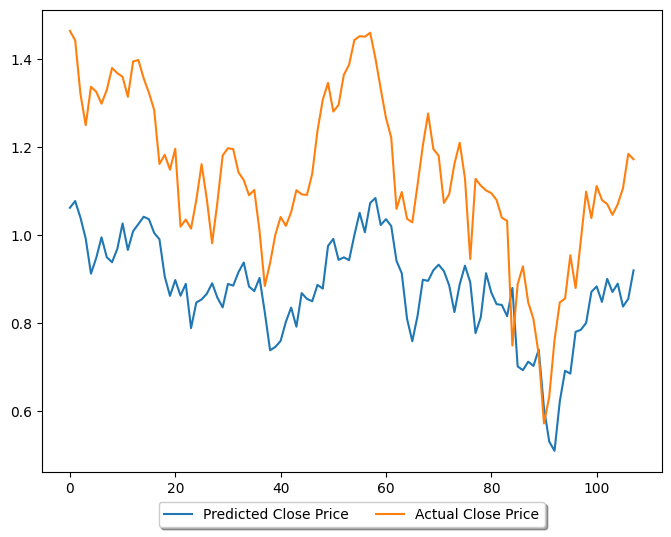

In [172]:
# plotting
plt.figure(figsize=(8,6))

# plt.plot([row[0] for row in y_train], label="Training Close Price")
plt.plot(predictions, label="Predicted Close Price")
plt.plot(test_label, label="Actual Close Price")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=2)
plt.show()

In [173]:
# Similarly it can be done for open price.